# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns


# Reading the Data

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis

In [4]:
columns=df.columns

In [5]:
a=df[columns].skew().sort_values()
a

BloodPressure              -1.843608
BMI                        -0.428982
SkinThickness               0.109372
Glucose                     0.173754
Outcome                     0.635017
Pregnancies                 0.901674
Age                         1.129597
DiabetesPedigreeFunction    1.919911
Insulin                     2.272251
dtype: float64

Normalising the data for columns with skew values greater than 0.75.

In [6]:
a=a[a>0.75]
a

Pregnancies                 0.901674
Age                         1.129597
DiabetesPedigreeFunction    1.919911
Insulin                     2.272251
dtype: float64

In [7]:
b=a.index
b

Index(['Pregnancies', 'Age', 'DiabetesPedigreeFunction', 'Insulin'], dtype='object')

In [8]:
df[b]=np.sqrt(df[b])

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.102555,0.127541,-0.096700,-0.106237,-0.031040,-0.049113,0.531063,0.180167
Glucose,0.102555,1.000000,0.152590,0.057328,0.238519,0.221071,0.127247,0.268586,0.466581
BloodPressure,0.127541,0.152590,1.000000,0.207371,0.097412,0.281805,0.044781,0.243897,0.065068
SkinThickness,-0.096700,0.057328,0.207371,1.000000,0.535045,0.392573,0.189617,-0.109284,0.074752
Insulin,-0.106237,0.238519,0.097412,0.535045,1.000000,0.190503,0.204892,-0.119577,0.072343
BMI,-0.031040,0.221071,0.281805,0.392573,0.190503,1.000000,0.144612,0.054826,0.292695
DiabetesPedigreeFunction,-0.049113,0.127247,0.044781,0.189617,0.204892,0.144612,1.000000,0.040624,0.180998
Age,0.531063,0.268586,0.243897,-0.109284,-0.119577,0.054826,0.040624,1.000000,0.258072
Outcome,0.180167,0.466581,0.065068,0.074752,0.072343,0.292695,0.180998,0.258072,1.000000


In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing values are present in the data.

# Visualisations

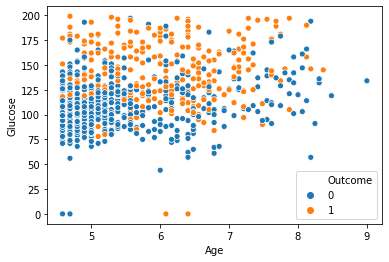

In [11]:
sns.scatterplot('Age','Glucose',data=df,hue='Outcome')

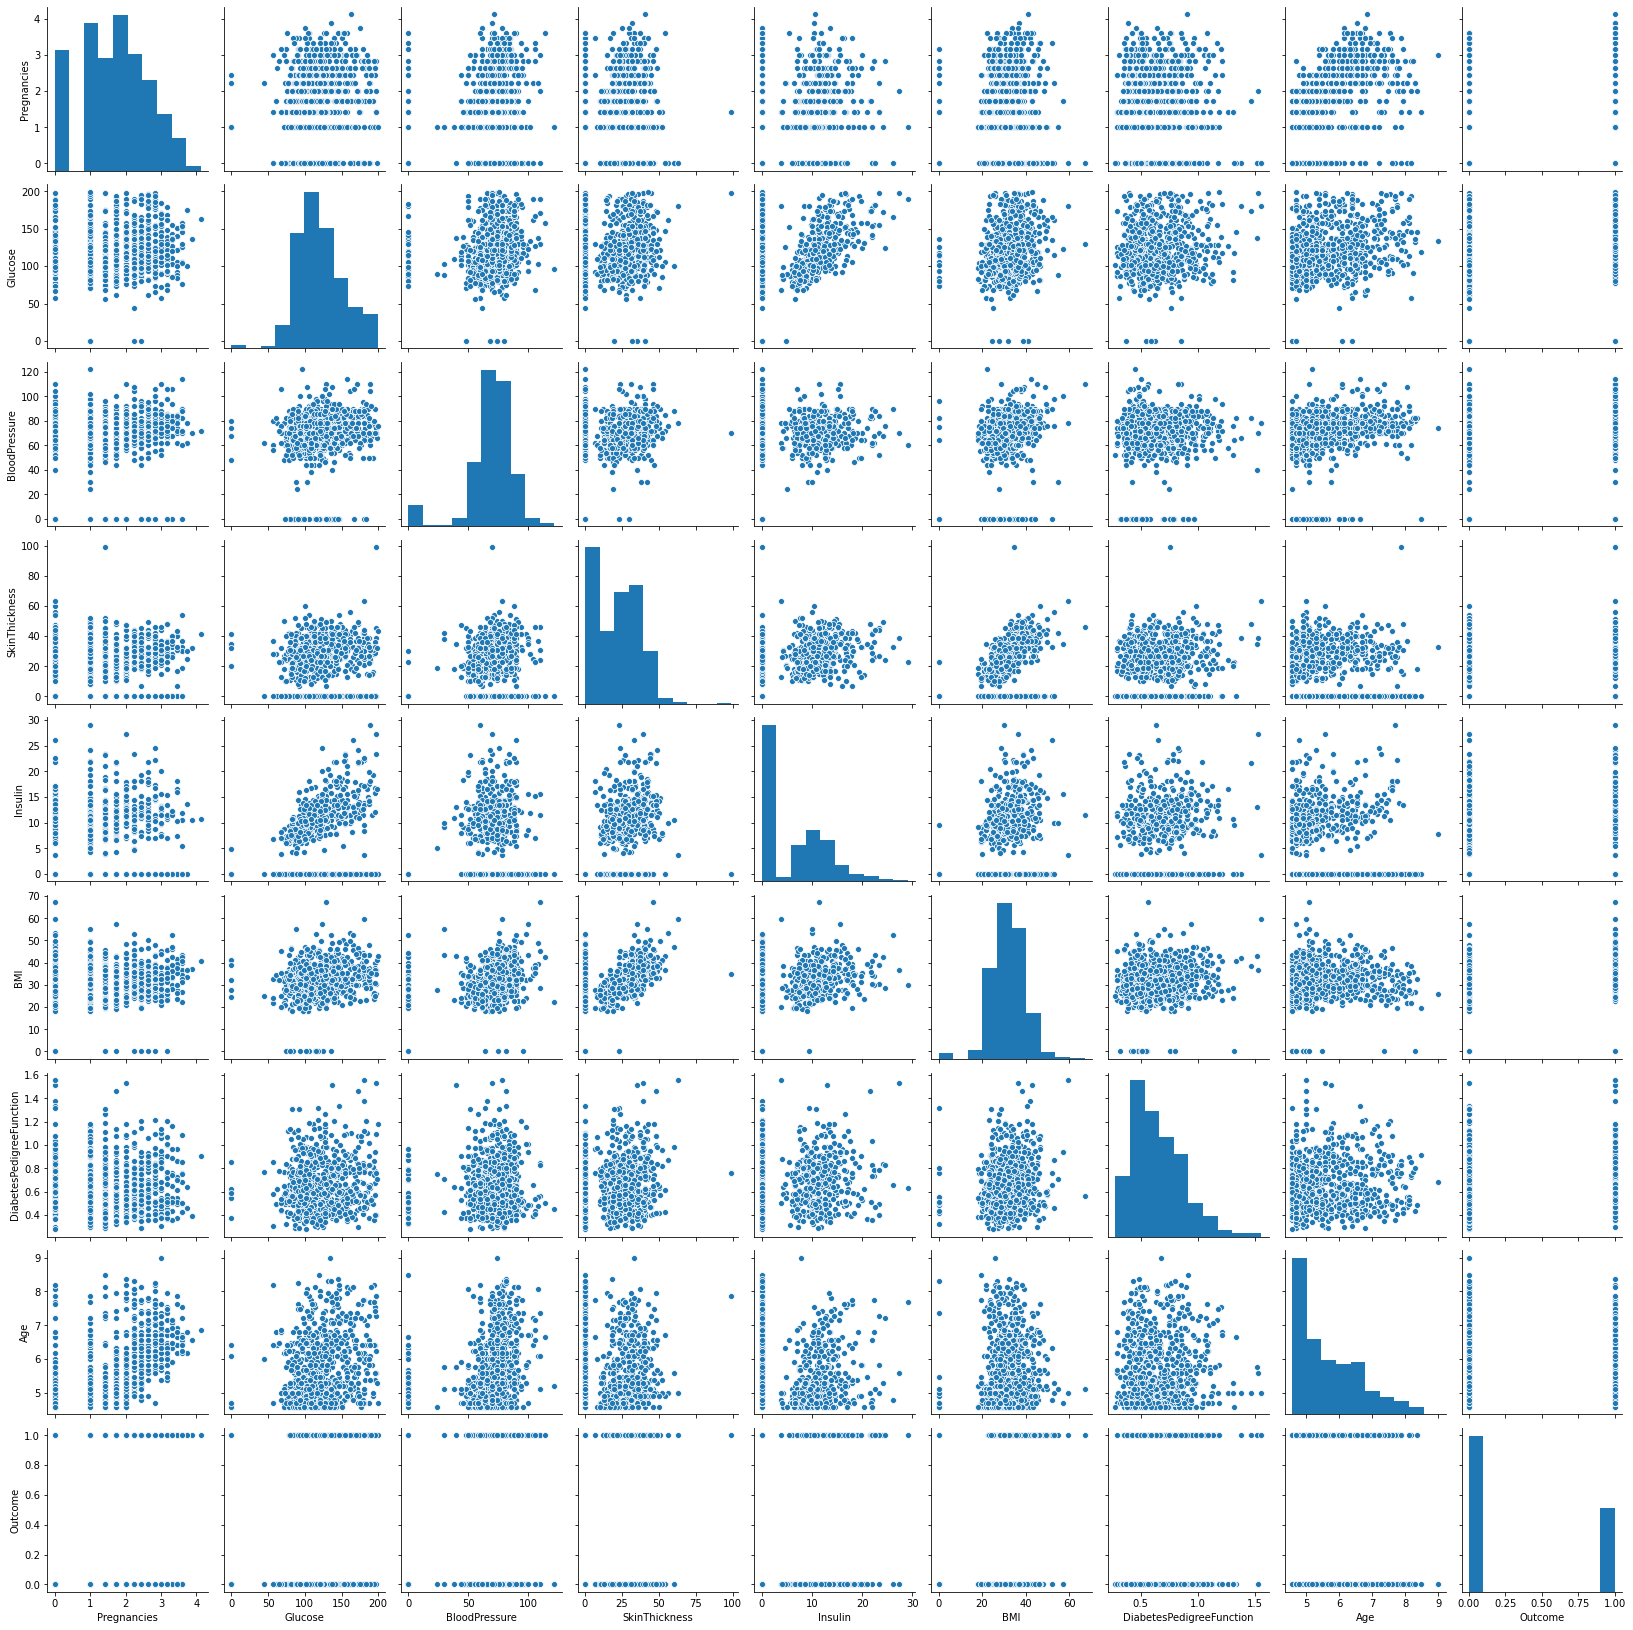

In [12]:
sns.pairplot(df)

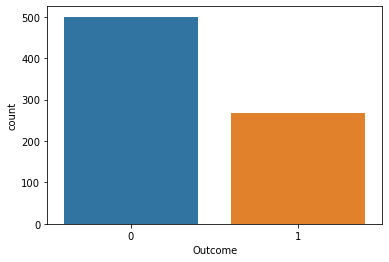

In [13]:
sns.countplot(x='Outcome',data=df)

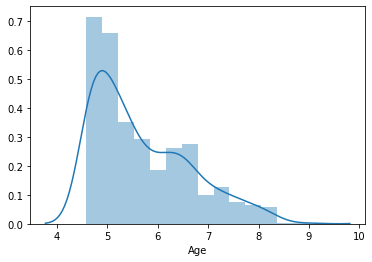

In [14]:
sns.distplot(df['Age'],kde=True)

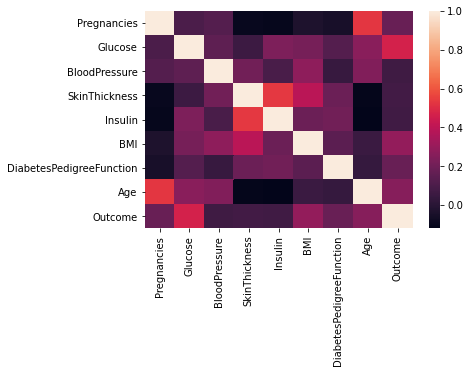

In [15]:
sns.heatmap(df.corr())

In [16]:
target=df.Outcome

In [17]:
df=df.drop('Outcome',axis=1)

# Training the Model

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train,X_test,Y_train,Y_test=train_test_split(df,target,test_size=0.2)

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [21]:
steps=[('Scaler',StandardScaler()),('LR',LogisticRegression())]

In [22]:
pipelines=Pipeline(steps)

In [23]:
parameters={'LR__C':np.logspace(0,4,20)}

In [24]:
cv=GridSearchCV(pipelines,parameters)

In [25]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('Scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('LR',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
           

In [26]:
cv_pred=cv.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

# Predictions

In [28]:
accuracy_score(cv_pred,Y_test)

0.7532467532467533

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(Y_test,cv_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       103
           1       0.68      0.49      0.57        51

    accuracy                           0.75       154
   macro avg       0.73      0.69      0.70       154
weighted avg       0.74      0.75      0.74       154



In [31]:
cv.score(X_test,Y_test)

0.7532467532467533

In [32]:
print('Best score: ', cv.best_score_)


Best score:  0.7638278022124484
